In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 1505 (delta 8), reused 15 (delta 5), pack-reused 1482
Receiving objects: 100% (1505/1505), 4.52 MiB | 3.95 MiB/s, done.
Resolving deltas: 100% (1008/1008), done.


In [ ]:
# install dependencies
!pip install -r /content/yolov5/requirements.txt

## **Load Dataset**

In [1]:
# Run to download our dataset 
!curl -L "https://app.roboflow.ai/ds/5iaul11201?key=4Tmi2Czrxl" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/images/60_jpg.rf.1ee15f42712fb7b4e7eec20124bb372a.jpg  
 extracting: train/images/new_217_jpg.rf.1efe5d3179b61138960e33fbea62b690.jpg  
 extracting: train/images/168_jpg.rf.1ed4f8e45d65c1b7a5e6bc1b47e1d8c0.jpg  
 extracting: train/images/new_3460_jpg.rf.1f543040046e295c37c3fdaf362a2e68.jpg  
 extracting: train/images/new_282_jpg.rf.1f30b1dde3879a4ecd32d22e3a5953c3.jpg  
 extracting: train/images/new_146_jpg.rf.1f7341cfa69888f5f5f80af8cffb4911.jpg  
 extracting: train/images/new_435_jpg.rf.1f574557c14419d1db6165140399fbdb.jpg  
 extracting: train/images/new_73_jpg.rf.1f85f0bebebbc78a233af5d2d68f72cd.jpg  
 extracting: train/images/new_304_jpg.rf.1e725f4dc3c8ace359cb4043f97e35c2.jpg  
 extracting: train/images/245_jpg.rf.1dd19b4f3210fd5aecf6d1d84d58958e.jpg  
 extracting: train/images/new_237_jpg.rf.1ebf9a09c87dcd75d2abe7bf7a72f548.jpg  
 extracting: train/images/146_jpg.rf.1f961ca62505beb1d730e4e88c846d2b.jpg  
 extra

## **Train**

In [2]:
# data.yaml contains details required for training i.e. train/val directory address and number of classes
# I have trained on yolov5s version (light/fast)
# Trained on pre trained weights - yolov5s.pt

%cd /content/yolov5/
!python train.py --img 640 --batch 16 --epochs 200 --data /content/data.yaml --cfg yolov5s.yaml --weights yolov5s.pt --nosave --cache

/content/yolov5
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(batch_size=16, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='/content/data.yaml', device='', epochs=200, evolve=False, hyp='', img_size=[640], multi_scale=False, name='', noautoanchor=False, nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

2020-07-14 13:53:09.443283: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Hyperparameters {'optimizer': 'SGD', 'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'tr

In [3]:
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

In [5]:
# save weights
%cp runs/exp0/weights/last.pt '/content/drive/My Drive/Colab Notebooks (1)/Made with ML/'

## **Inference**

In [7]:
# Give the path of test dir/images in --source
# Give the path of our weights in --weights
!python detect.py --source '/content/Test/' --weights 'runs/exp0/weights/last.pt' --conf 0.4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/content/Test/', update=False, view_img=False, weights=['runs/exp0/weights/last.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Fusing layers... Model Summary: 140 layers, 7.25191e+06 parameters, 6.61683e+06 gradients
image 1/10 /content/Test/132910343.jpg: 512x640 2 English s, 2 Hindi s, Done. (0.033s)
image 2/10 /content/Test/51fKq6o4O0L._SX466_.jpg: 256x640 1 English s, 7 Hindi s, Done. (0.025s)
image 3/10 /content/Test/acp-board-with-led-500x500.jpg: 640x640 3 Hindi s, Done. (0.039s)
image 4/10 /content/Test/do-not-look-down-from-here-sign-hindi-india-CNMX9M.jpg: 512x640 10 English s, 6 Hindi s, Done. (0.033s)
image 5/10 /content/Test/hindi-letter-sign-board-500x500.jpg: 640x640 6 Hindi s, Done. (0.036s)
image 6/10 /content/Test/images.jpg: 512x640 4 Hindi s, Done. (0.032s)
image

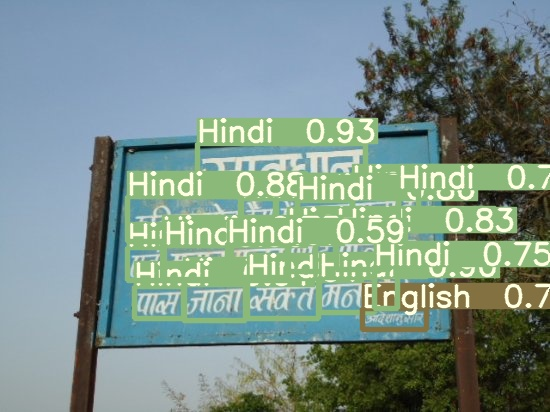

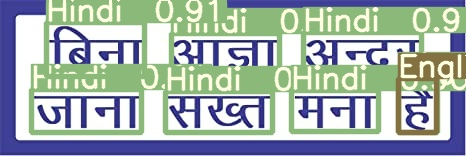

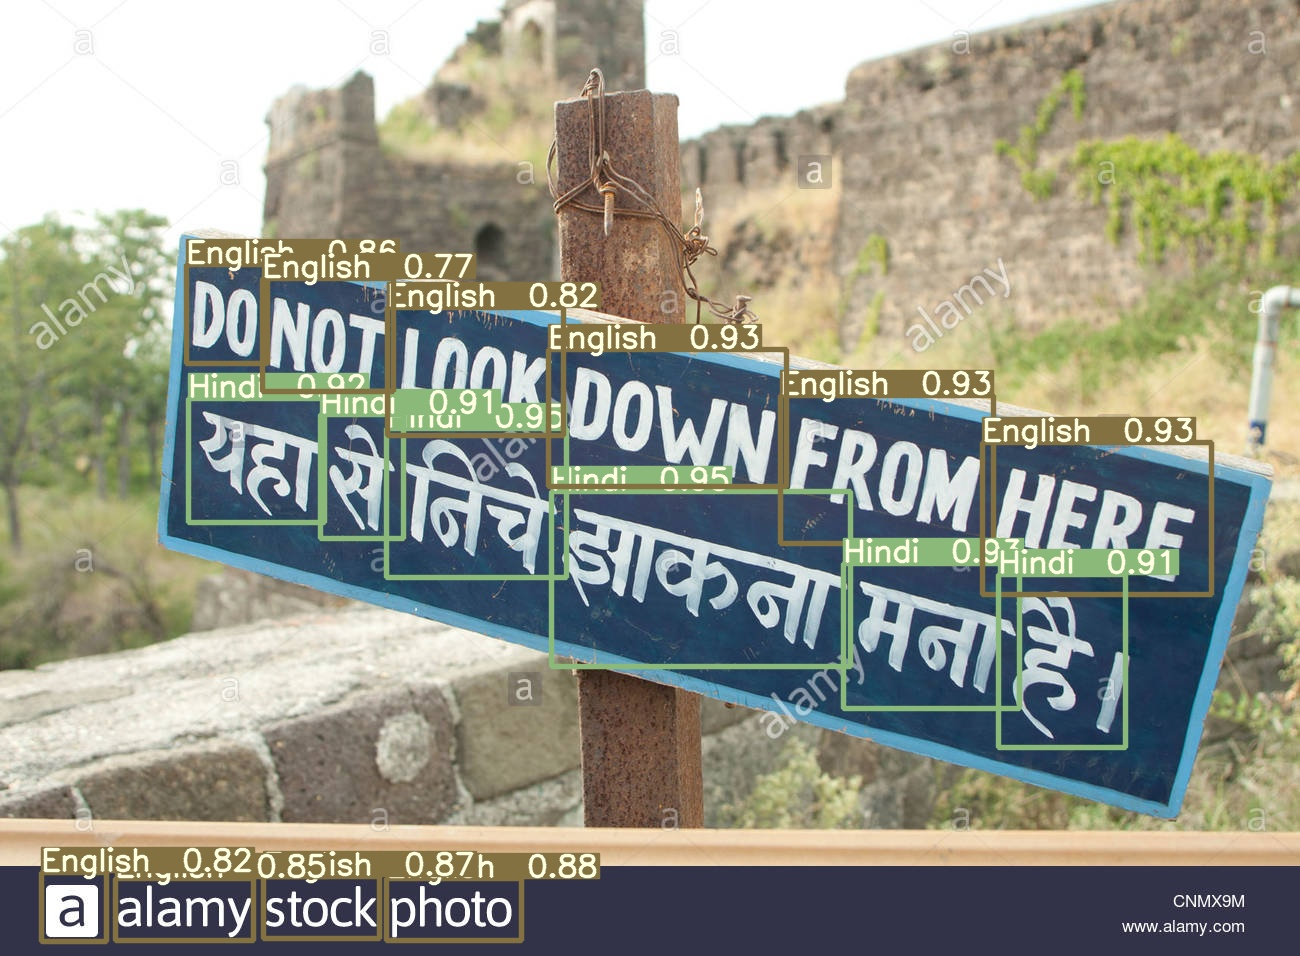

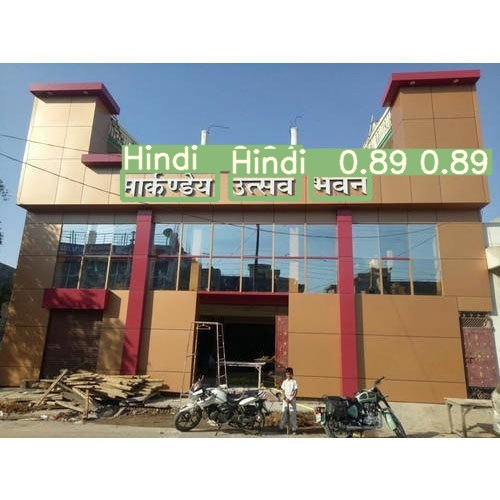

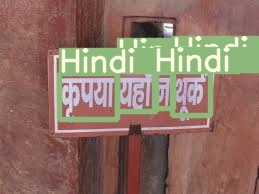

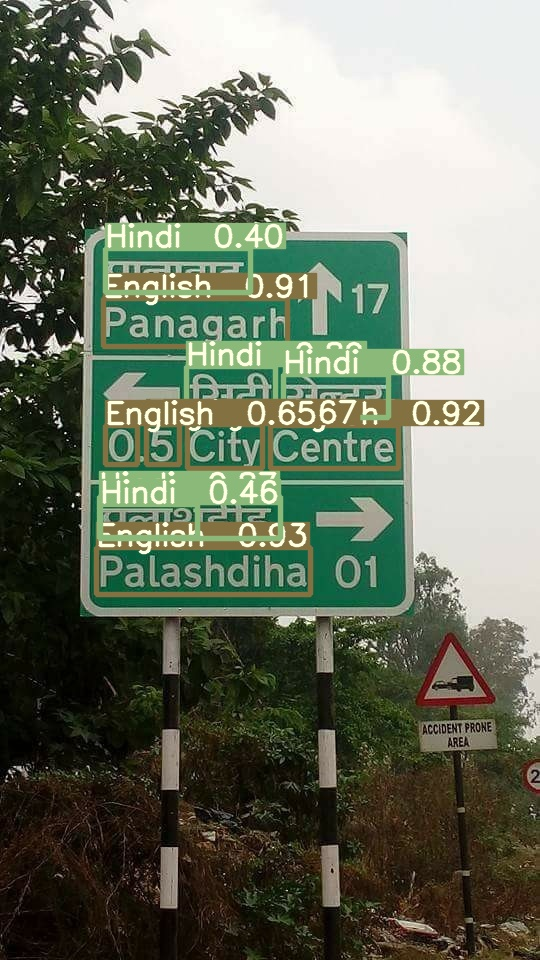

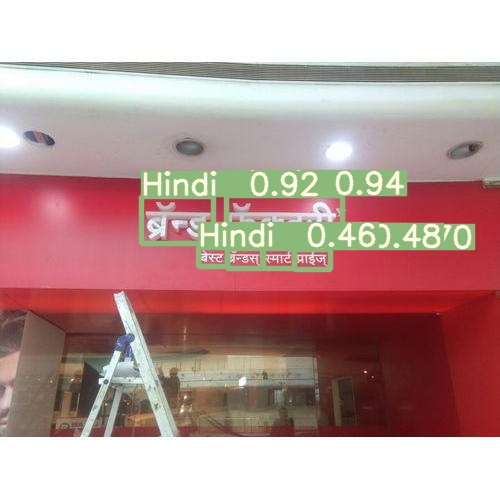

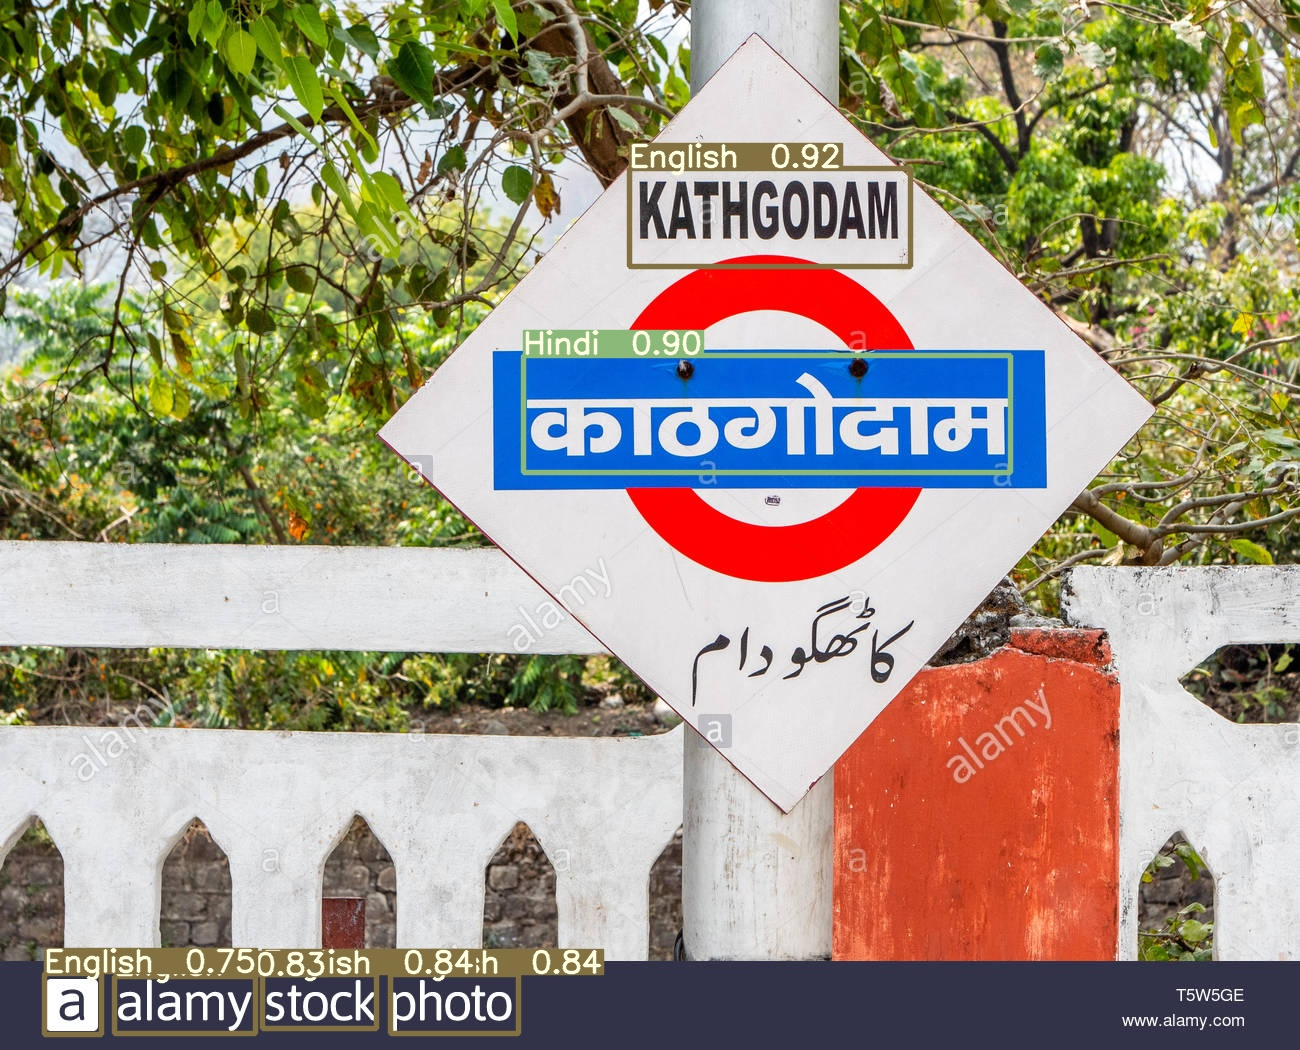

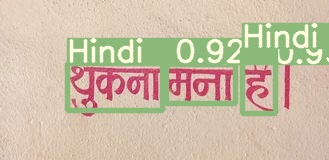

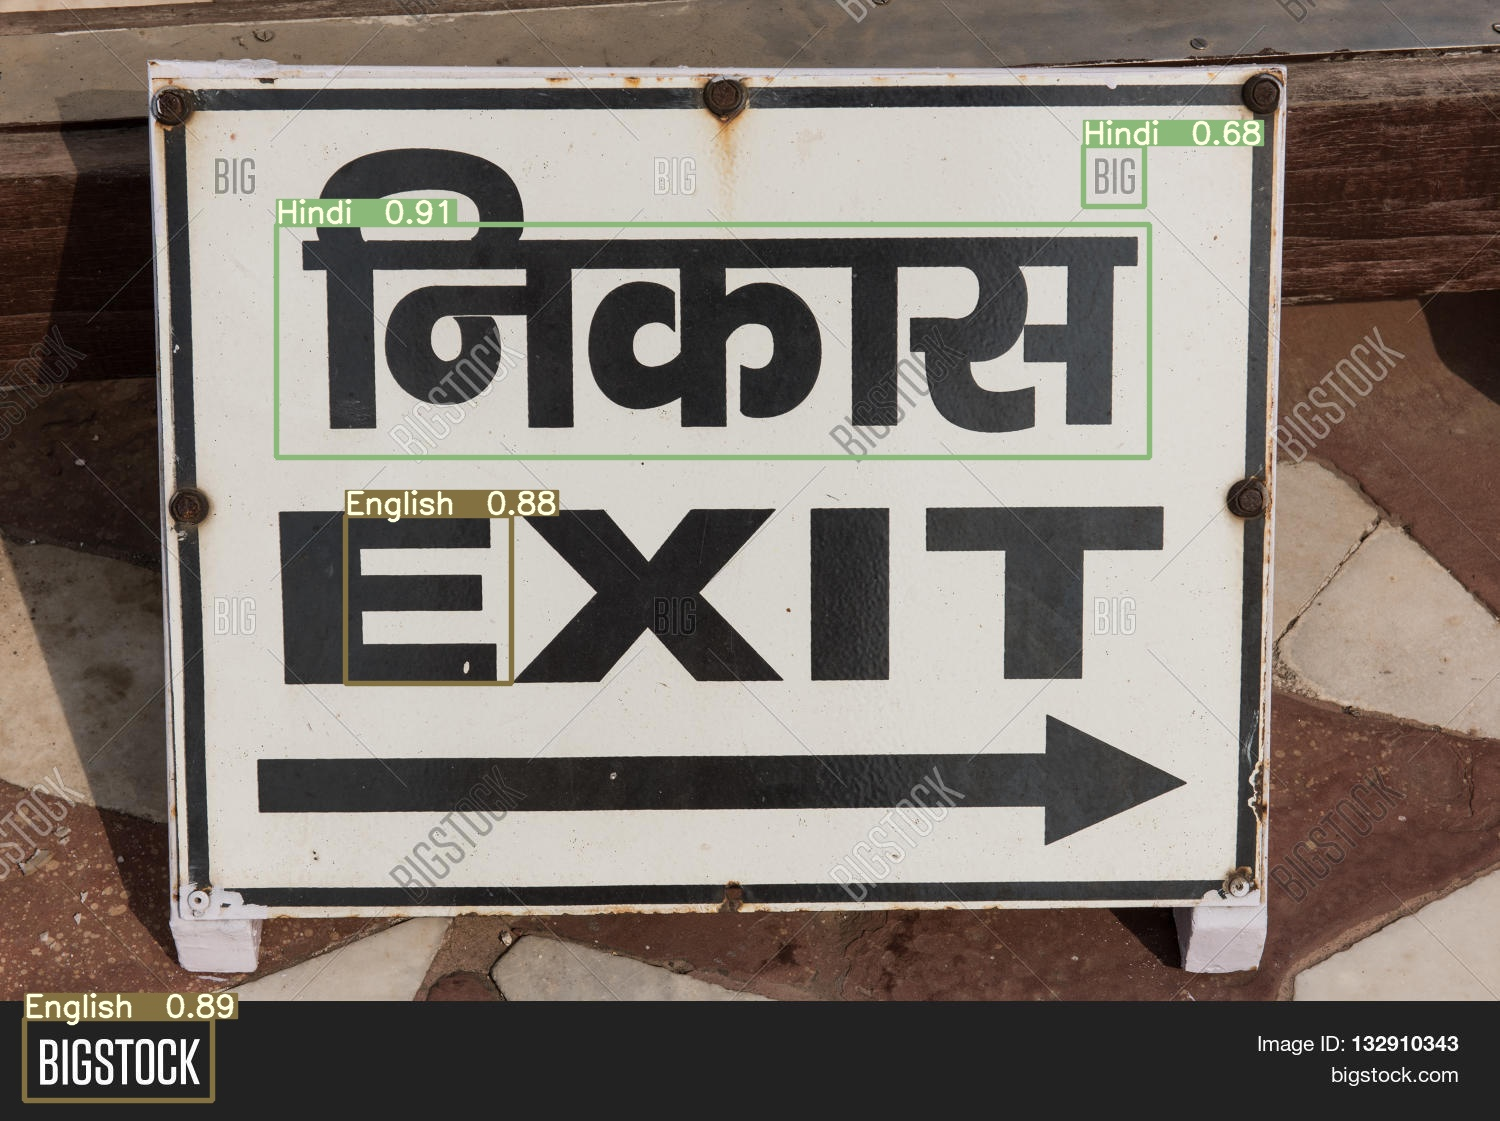

In [8]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/inference/output/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")